Number of faces detected: 3


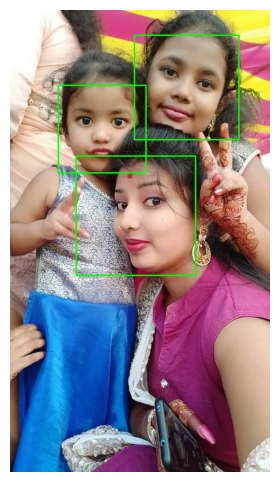

In [1]:
# Install dependencies if not installed
# !pip install opencv-python matplotlib

import cv2
import matplotlib.pyplot as plt
# Load Haar Cascade Classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
image_path = r"C:\\Users\\Anushka\\OneDrive\\Pictures\\Uploads\\FB_IMG_1677685619574.jpg"  # <--- change this to your image name
image = cv2.imread(image_path)

if image is None:
    print("⚠️ Local image not found. Using online test image instead...")

    # =============== OPTION 2: Download sample Lena image from OpenCV repo ============
    import urllib.request
    import numpy as np

    url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
print(f"Number of faces detected: {len(faces)}")
# Draw rectangles around faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
# Convert BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Show result
plt.figure(figsize=(8,6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [3]:
# Install dependencies if not installed
# !pip install opencv-python matplotlib

import cv2

# Load Haar Cascade for full-body detection
body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')

# Video file path (replace with your video file)
video_path = "video.mp4"  # <--- change this to your video file

# Open the video
#cap = cv2.VideoCapture(video_path)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("⚠️ Error: Cannot open video file. Make sure the path is correct.")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            break  # Video ended

        # Convert frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect full bodies
        bodies = body_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))

        # Draw rectangles around detected bodies
        for (x, y, w, h) in bodies:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the frame
        cv2.imshow('Full Body Detection', frame)

        # Press 'q' to exit early
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release video capture and close windows
    cap.release()
    cv2.destroyAllWindows()


In [4]:
#people counter using face detection
import cv2
import time

# Load Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Open webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open webcam")
    exit()

start_time = time.time()
frame_count = 0
faces_per_frame = []

# Run for 30 seconds
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangles around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Show count on the frame
    cv2.putText(frame, f"Count: {len(faces)}", (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the frame
    cv2.imshow("People Counter", frame)

    # Save the number of faces in this frame
    faces_per_frame.append(len(faces))
    frame_count += 1

    # Stop after 10 seconds
    if time.time() - start_time > 30:
        break

    # Wait a little so window can update
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Print results
print(f"Total frames processed: {frame_count}")
print(f"Faces detected per frame: {faces_per_frame}")
print(f"Average faces per frame: {sum(faces_per_frame)/frame_count:.2f}")

Total frames processed: 884
Faces detected per frame: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [6]:
import cv2
import time

# Load Haar Cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")

# Open webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open webcam")
    exit()

start_time = time.time()
frame_count = 0
faces_per_frame = []
eyes_per_frame = []
smiles_per_frame = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    total_eyes = 0
    total_smiles = 0

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        # Detect eyes
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 10)
        total_eyes += len(eyes)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 0), 2)

        # Detect smiles
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 22)
        total_smiles += len(smiles)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)

    # Display counts on frame
    cv2.putText(frame, f"Faces: {len(faces)}", (20, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    cv2.putText(frame, f"Eyes: {total_eyes}", (20, 60),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)
    cv2.putText(frame, f"Smiles: {total_smiles}", (20, 90),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Save stats
    faces_per_frame.append(len(faces))
    eyes_per_frame.append(total_eyes)
    smiles_per_frame.append(total_smiles)
    frame_count += 1

    cv2.imshow("People, Eyes, and Smile Counter", frame)

    # Stop after 30 seconds
    if time.time() - start_time > 30:
        break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Print summary
print(f"Total frames processed: {frame_count}")
print(f"Faces per frame: {faces_per_frame}")
print(f"Eyes per frame: {eyes_per_frame}")
print(f"Smiles per frame: {smiles_per_frame}")
print(f"Average faces per frame: {sum(faces_per_frame)/frame_count:.2f}")
print(f"Average eyes per frame: {sum(eyes_per_frame)/frame_count:.2f}")
print(f"Average smiles per frame: {sum(smiles_per_frame)/frame_count:.2f}")


Total frames processed: 871
Faces per frame: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 

In [7]:
import tkinter as tk
from tkinter import scrolledtext
import datetime
import re
from typing import Dict, Any, List

# ------------------- Your Chatbot Logic -------------------
class CollegeChatbot:
    def __init__(self):
        self.college_data = self.load_college_data()
        self.conversation_history = []

    def load_college_data(self) -> Dict[str, Any]:
        return {
            "college_info": {"name": "Tech University", "established": "1995", "location": "Tech City, State 12345"},
            "fee_structure": {
                "undergraduate": {"Computer Science": {"total": 30000}},
                "postgraduate": {"MBA": {"total": 44000}}
            },
            "timetable": {"Computer Science": {"Semester 1": {"Monday": [
                {"time": "9:00-10:00", "subject": "Programming Fundamentals", "room": "CS101"}]}}},
            "admissions": {"eligibility": {"undergraduate": "60% in 12th", "postgraduate": "60% in Bachelor's"}},
            "contact": {"phone": "+91-9876543210", "email": "info@techuniversity.edu"},
            "events": [{"name": "TechFest 2024", "date": "2024-03-15", "description": "Annual festival"}]
        }

    def preprocess_query(self, query: str) -> str:
        return re.sub(r"[^\w\s]", "", query.lower().strip())

    def extract_keywords(self, query: str) -> List[str]:
        keywords = {
            "fee": ["fee", "cost", "charges", "tuition"],
            "timetable": ["timetable", "schedule", "class"],
            "admission": ["admission", "apply", "eligibility"],
            "contact": ["contact", "phone", "email", "address"],
            "course": ["course", "program", "degree"],
            "event": ["event", "fest", "festival"],
            "college": ["college", "university", "about"]
        }
        found = []
        for cat, terms in keywords.items():
            if any(term in query for term in terms):
                found.append(cat)
        return found

    def get_fee_info(self, query):
        return "💰 Fees:\nComputer Science UG = ₹30,000/year\nMBA PG = ₹44,000/year"

    def get_timetable_info(self, query):
        return {"Monday": ["9:00-10:00 AM: Programming Lab (CSE)", "10:00-11:00 AM: Mathematics", "11:15-12:15 PM: Physics", "2:00-3:00 PM: English"],
            "Tuesday": ["9:00-10:00 AM: Data Structures", "10:00-11:00 AM: DBMS Lab", "2:00-3:00 PM: Computer Networks", "3:15-4:15 PM: Seminar"],
            "Wednesday": ["9:00-10:00 AM: Software Engineering", "11:00-12:00 PM: Web Technologies", "2:00-4:00 PM: Project Work"],
            "Thursday": ["9:00-10:00 AM: Machine Learning", "10:15-11:15 AM: Algorithm Analysis", "2:00-3:00 PM: Industry Interaction"],
            "Friday": ["9:00-10:00 AM: Technical Communication", "11:00-12:00 PM: Elective Subject", "2:00-3:00 PM: Sports/Cultural"]}

    def get_admission_info(self, query):
        return "🎓 Admission: UG needs 60% in 12th | PG needs 60% in Bachelor's"

    def get_contact_info(self, query):
        return "📞 Contact: +91-9876543210 | Email: info@techuniversity.edu"

    def get_event_info(self, query):
        return "🎉 Event: TechFest 2024 on 15 March"

    def get_college_info(self, query):
        return "🏛️ Tech University | Established: 1995 | Location: Tech City"

    def get_help_info(self):
        return ("🤖 I can help you with:\n"
                "- Fees\n- Timetable\n- Admissions\n- Contact\n- Courses\n- Events\n- College info")

    def process_query(self, user_input: str) -> str:
        if not user_input.strip():
            return "Please type something!"
        query = self.preprocess_query(user_input)
        keywords = self.extract_keywords(query)

        if any(word in query for word in ["help", "hi", "hello", "start"]):
            return self.get_help_info()
        if "fee" in keywords:
            return self.get_fee_info(query)
        elif "timetable" in keywords:
            return self.get_timetable_info(query)
        elif "admission" in keywords:
            return self.get_admission_info(query)
        elif "contact" in keywords:
            return self.get_contact_info(query)
        elif "event" in keywords:
            return self.get_event_info(query)
        elif "college" in keywords:
            return self.get_college_info(query)
        else:
            return "Sorry, I didn’t understand. Type 'help' to know what I can do."


# ------------------- GUI Part -------------------
class ChatGUI:
    def __init__(self, root, bot):
        self.bot = bot
        self.root = root
        self.root.title("🎓 Tech University Chatbot")
        self.root.geometry("600x500")

        # Chat Display
        self.chat_area = scrolledtext.ScrolledText(root, wrap=tk.WORD, state="disabled", font=("Arial", 11))
        self.chat_area.pack(padx=10, pady=10, fill=tk.BOTH, expand=True)

        # User Input
        self.entry = tk.Entry(root, font=("Arial", 12))
        self.entry.pack(padx=10, pady=5, fill=tk.X)
        self.entry.bind("<Return>", self.send_message)

        # Send Button
        self.send_btn = tk.Button(root, text="Send", command=self.send_message, bg="blue", fg="white", font=("Arial", 11))
        self.send_btn.pack(pady=5)

        self.display_bot_message("👋 Hello! I’m your College Assistant.\nType 'help' to know what I can do!")

    def display_bot_message(self, message):
        self.chat_area.config(state="normal")
        self.chat_area.insert(tk.END, f"\n🤖 Bot: {message}\n")
        self.chat_area.config(state="disabled")
        self.chat_area.see(tk.END)

    def display_user_message(self, message):
        self.chat_area.config(state="normal")
        self.chat_area.insert(tk.END, f"\n🧑 You: {message}\n")
        self.chat_area.config(state="disabled")
        self.chat_area.see(tk.END)

    def send_message(self, event=None):
        user_input = self.entry.get().strip()
        if user_input:
            self.display_user_message(user_input)
            response = self.bot.process_query(user_input)
            self.display_bot_message(response)
        self.entry.delete(0, tk.END)


# ------------------- Run App -------------------
if __name__ == "__main__":
    root = tk.Tk()
    bot = CollegeChatbot()
    app = ChatGUI(root, bot)
    root.mainloop()
